---
title: "Evaluation"
author: ""
format: revealjs
---

<!-- [Preview](https://example.com){preview-link="true"} -->
### Дисклеймеры
- Оценка LLM ≠ Оценка приложений с LLM
- Эксперименты, а не функции
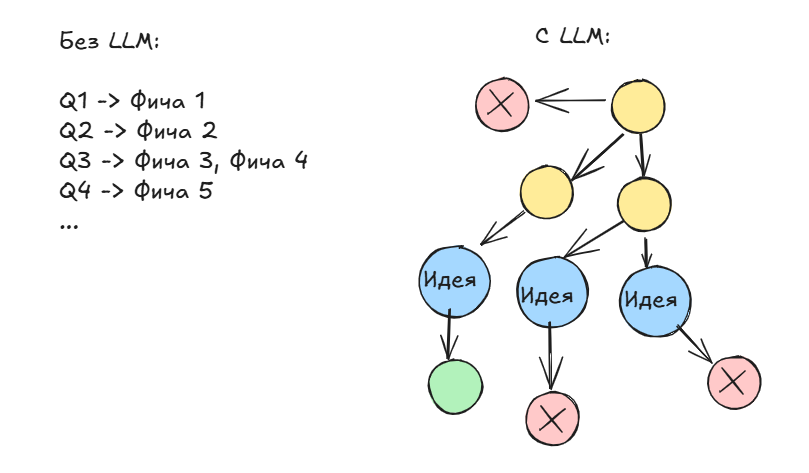
--- 

## Появляющиеся проблемы
::: {layout-ncol=2}
- устраняем одну проблему, появляются другие
- огромные промпты
- не видно, как работает система за пределами известных кейсов

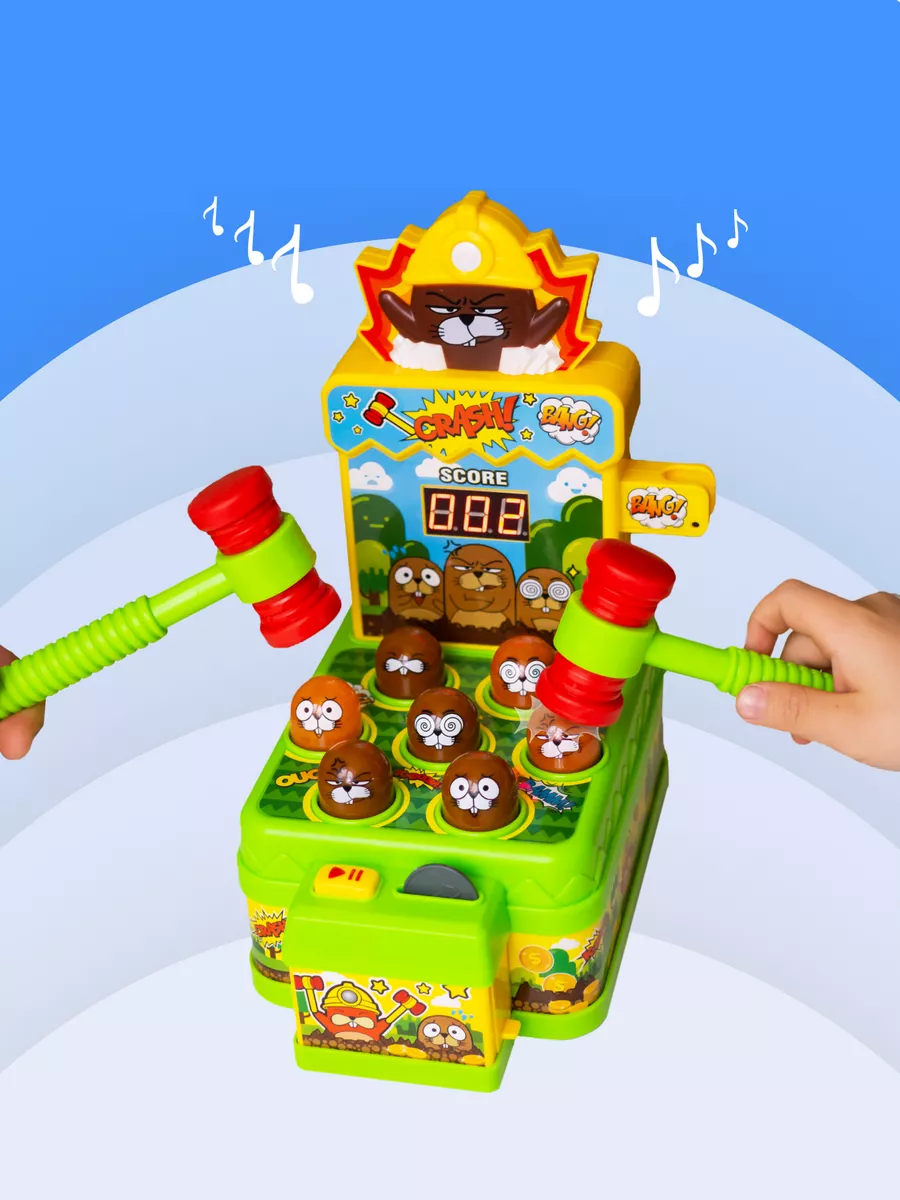{width=70%, fig-align="right"}
:::



## Основная идея - быстро итерироваться
* нормальная система оценивающая нашу систему
* нормальное логирование поведения системы
* изменения поведения системы


## Типы оценок
- Уровень 1: Модульные тесты
- Уровень 2: Оценка моделью и человеком (включая отладку)
- Уровень 3: A/B-тестирование

---

GPT Researcher
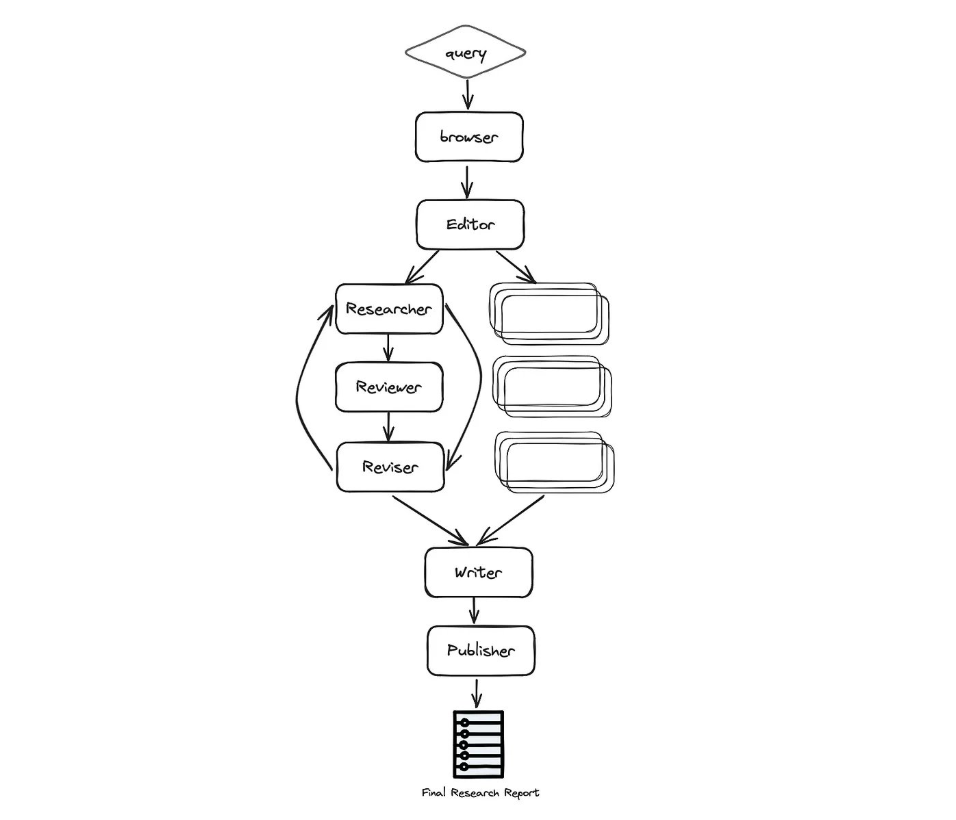{width=75%}

---

## Логирование

```{.python code-line-numbers="|7,8|15|16|17"}
import logging
import os
import sys
from logging.handlers import RotatingFileHandler
from pathlib import Path

LOG_FILE = "logs/researcher-log.log"
LOG_FORMAT = "[%(asctime)s] [%(name)s:%(lineno)d] [%(levelname)s] %(message)s"


def setup_logging():
    logs_dir = Path("logs")
    logs_dir.mkdir(exist_ok=True)

    root_logger = logging.getLogger()
    root_logger.setLevel(logging.INFO)
    formatter = logging.Formatter(LOG_FORMAT)

    # --- Fix Windows console encoding issues ---
    if os.name == "nt":  # Windows only
        try:
            sys.stdout.reconfigure(encoding="utf-8")
        except AttributeError:
            import io

            sys.stdout = io.TextIOWrapper(sys.stdout.buffer, encoding="utf-8")

    # Console handler
    console_handler = logging.StreamHandler(sys.stdout)
    console_handler.setFormatter(formatter)

    # File handler with UTF-8 encoding
    file_handler = RotatingFileHandler(LOG_FILE, encoding="utf-8")
    file_handler.setFormatter(formatter)

    if root_logger.hasHandlers():
        root_logger.handlers.clear()

    root_logger.addHandler(console_handler)
    root_logger.addHandler(file_handler)
```

---

#### В файле проекта `research.py`
```{.python code-line-numbers="|1|13,14"}
logger = logging.getLogger(__name__)
...
try:
            report = await self.research(
                parent_query=parent_query,
                query=subtopic,
                research_report="subtopic_report",
                verbose=verbose,
                source=source,
                tone=self.tone,
                headers=None,
            )
        except Exception as e:
            logger.error(f"Error in researching topic {subtopic}: {e}")
            report = ""
```

---

## Arize Phoenix

Запустить:
```{.bash}
phoenix serve
```
Трейсить:

```{.python}
from openinference.instrumentation.langchain import LangChainInstrumentor
from phoenix.otel import register

tracer_provider = register(
  project_name="gpt-researcher",
  endpoint="http://localhost:6006/v1/traces",
)

LangChainInstrumentor().instrument(tracer_provider=tracer_provider)
```

---

### Найти эксперта в предметной области
- Он устанавливает стандарт
- Учитываются невысказанные ожидания
- Последовательность в суждениях
- Чувство сопричастности

## Датасет
- Комплексное тестирование
- Реалистичное взаимодействие
- Выявляет слабые стороны

### Как структурировать
- Дать составить эксперту
- Использовать существующие данные
- Генерировать синтетические данные

---

### Сделать annotation tool
:::::::::::::: {.columns}
::: {.column width="60%"}
- весь контекст в одном месте
- простое получение ОС
- открытый фидбэк
- фильтрация и сортировка
- горячие главиши
- фреймворки: Gradio, Panel, Streamlit, Shiny For Python
- лучше начать с электронной таблицы, чем с ничего!
:::
::: {.column width="40%"}
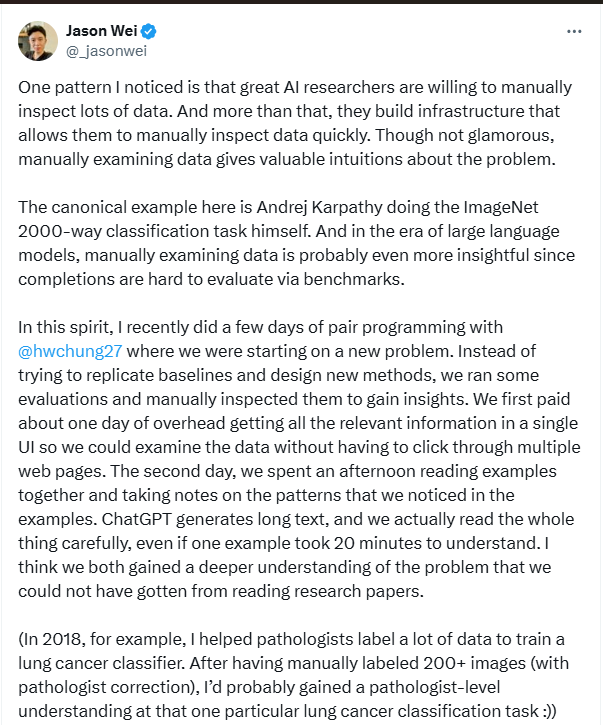
:::
::::::::::::::


---

## Частые ошибки
- Слишком много показателей (разрозненное внимание)
- Произвольные системы оценки (от 1 до 5)
- Игнорирование экспертов в предметной области
- Непроверенные показатели (полнота ответа. тормозят процесс, ложное ощущение прогресса)
- Пропуск анализа ошибок

---

